# Data Analysis and Preprocessing (EDA)




### Exploratory Data Analysis (EDA) - `fraud_data`

- Focuses on understanding relationships between variables.
- Aims to identify patterns that distinguish fraudulent and non-fraudulent transactions.
- Seeks to uncover trends based on geolocation.


In [1]:
import os
import sys

sys.path.insert(0,os.path.dirname(os.getcwd()))

In [2]:
from scripts import data_preprocessing

In [3]:
dataProcessor=data_preprocessing.DataPreprocessing()

In [4]:
# Example usage:
import pandas as pd
fraud_data = dataProcessor.data_reading('../Data/Fraud_Data.csv')
geolocationData=dataProcessor.data_reading("../Data/IpAddress_to_Country.csv")

In [5]:
geolocationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB


In [6]:
fraud_data.tail()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0
151111,138208,2015-06-10 07:02:20,2015-07-21 02:03:53,20,ZINIADFCLHYPG,Direct,IE,M,38,4.103825e+09,0


In [7]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   user_id         151112 non-null  int64  
 1   signup_time     151112 non-null  object 
 2   purchase_time   151112 non-null  object 
 3   purchase_value  151112 non-null  int64  
 4   device_id       151112 non-null  object 
 5   source          151112 non-null  object 
 6   browser         151112 non-null  object 
 7   sex             151112 non-null  object 
 8   age             151112 non-null  int64  
 9   ip_address      151112 non-null  float64
 10  class           151112 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.7+ MB


In [8]:
fraud_data_clean = dataProcessor.handle_missing_values(fraud_data)

Missing values per column:
 user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
dtype: int64


In [9]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


In [10]:
# Apply the cleaning function to both datasets
fraud_data_clean = dataProcessor.clean_data(fraud_data_clean)

signup_time      datetime64[ns]
purchase_time    datetime64[ns]
dtype: object


In [11]:
fraud_data.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


#### Descriptive Statistics

- Obtain an overall statistical summary for numeric features (e.g., `purchase_value`, `age`).
- Review high-level statistics of the dataset to understand its distribution.


In [12]:
dataProcessor.Summary_statistics(fraud_data_clean)

             user_id                    signup_time  \
count  151112.000000                         151112   
mean   200171.040970  2015-04-20 00:56:09.511329280   
min         2.000000            2015-01-01 00:00:42   
25%    100642.500000     2015-02-18 09:52:48.500000   
50%    199958.000000            2015-04-19 04:41:30   
75%    300054.000000  2015-06-18 14:47:22.750000128   
max    400000.000000            2015-08-18 04:40:29   
std    115369.285024                            NaN   

                       purchase_time  purchase_value            age  \
count                         151112   151112.000000  151112.000000   
mean   2015-06-16 02:56:38.759952896       36.935372      33.140704   
min              2015-01-01 00:00:44        9.000000      18.000000   
25%       2015-04-18 14:41:25.500000       22.000000      27.000000   
50%       2015-06-18 13:46:17.500000       35.000000      33.000000   
75%       2015-08-17 18:48:31.500000       49.000000      39.000000   
max    

d:\10Academy\Week8&9\scripts\data_preprocessing.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class', data=df, palette="Set1")


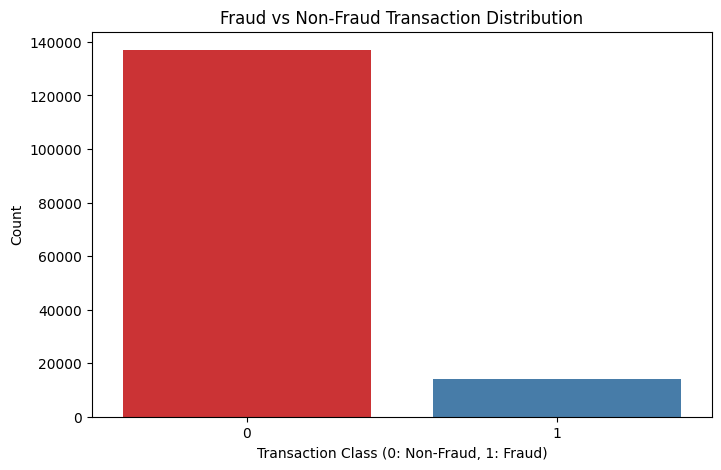

In [13]:
dataProcessor.Visualize_class_distribution(fraud_data_clean)

In [14]:
dataProcessor.class_distribution_percentages(fraud_data_clean)

Class distribution (fraud vs non-fraud):
class
0    90.635423
1     9.364577
Name: proportion, dtype: float64


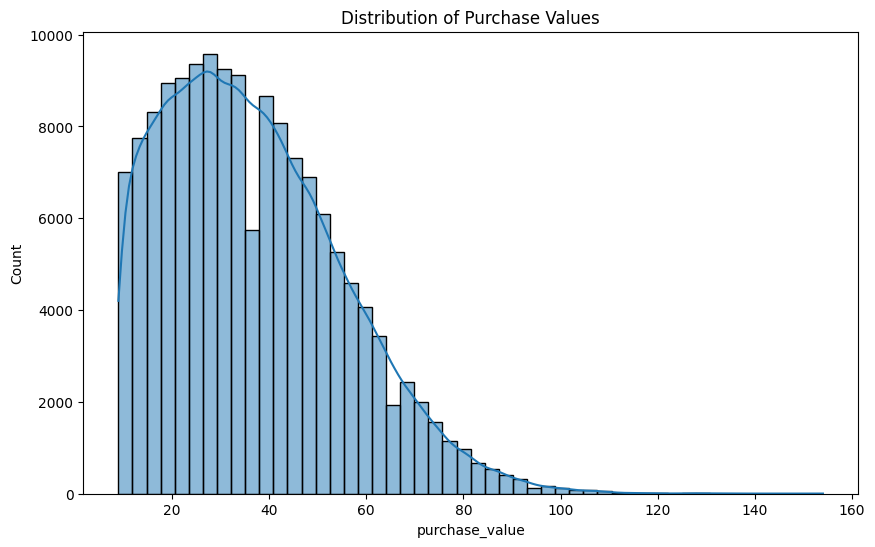

In [15]:
# Univariate analysis for fraud_data
dataProcessor.Univariate_analysis(fraud_data_clean)

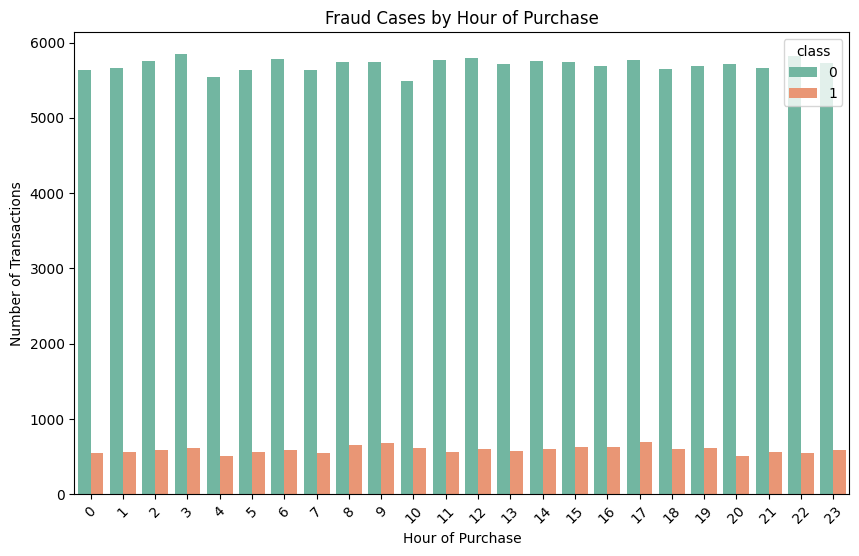

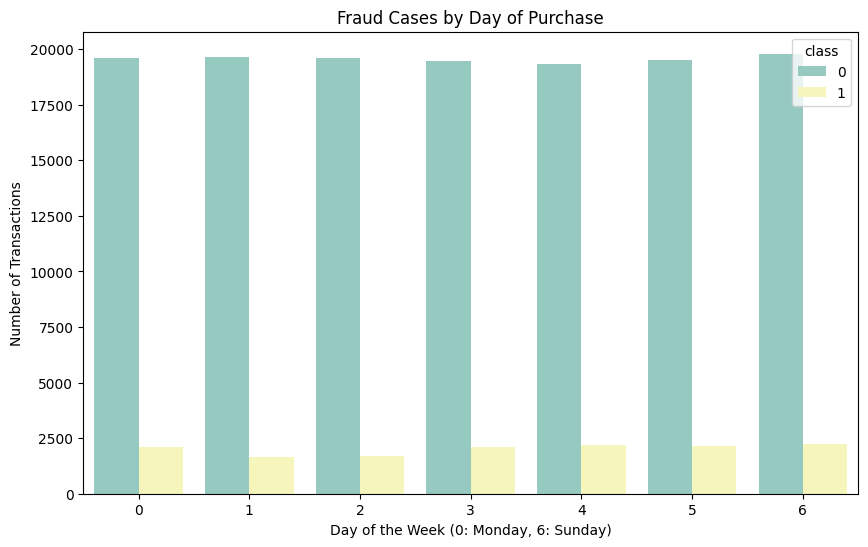

In [16]:
dataProcessor.time_based_insights(fraud_data_clean)

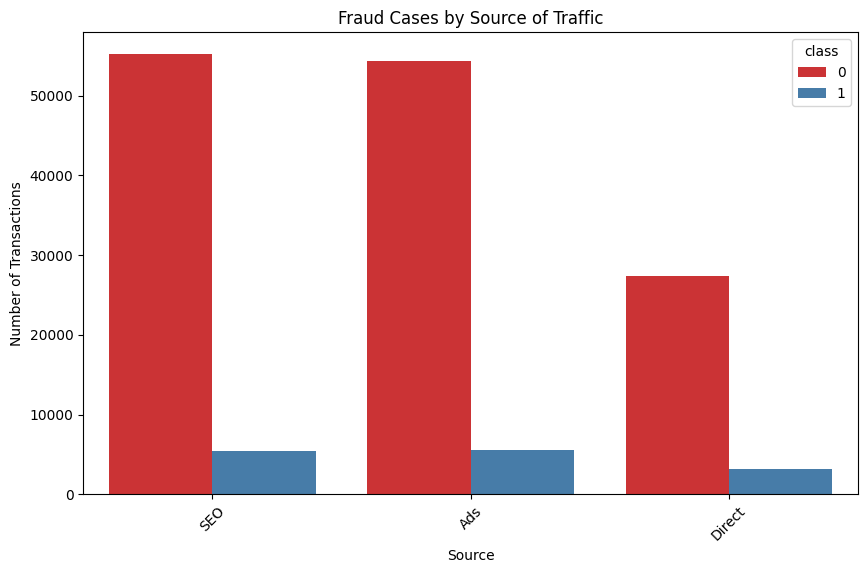

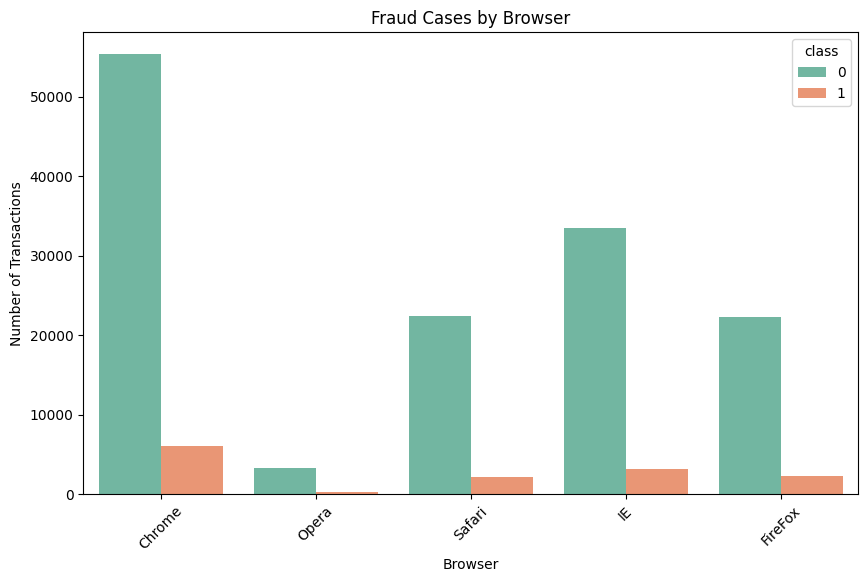

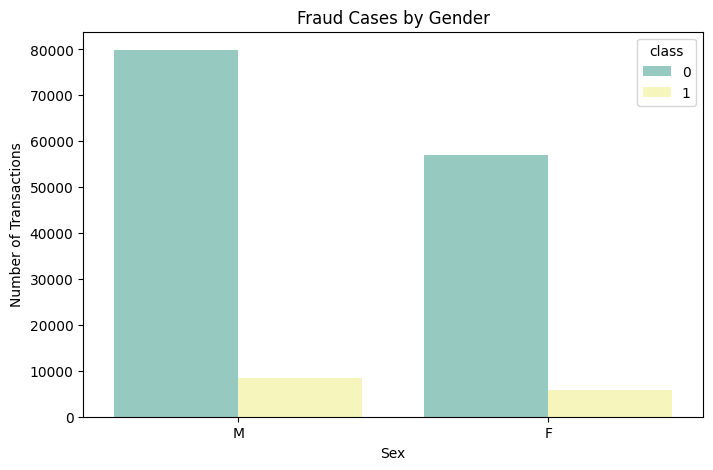

In [17]:
dataProcessor.analyze_categorical_variables(fraud_data_clean)

In [18]:
MergedData=dataProcessor.merge_fraud_with_ip(fraud_data_clean,geolocationData)

In [19]:
MergedData.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,signup_hour,purchase_hour,signup_day,purchase_day,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,22,2,1,5,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,20,1,6,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,18,18,3,3,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443,0,21,13,1,0,None
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,7,18,1,2,United States


In [20]:
MergedData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151112 entries, 0 to 151111
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   user_id         151112 non-null  int64         
 1   signup_time     151112 non-null  datetime64[ns]
 2   purchase_time   151112 non-null  datetime64[ns]
 3   purchase_value  151112 non-null  int64         
 4   device_id       151112 non-null  object        
 5   source          151112 non-null  object        
 6   browser         151112 non-null  object        
 7   sex             151112 non-null  object        
 8   age             151112 non-null  int64         
 9   ip_address      151112 non-null  int64         
 10  class           151112 non-null  int64         
 11  signup_hour     151112 non-null  int32         
 12  purchase_hour   151112 non-null  int32         
 13  signup_day      151112 non-null  int32         
 14  purchase_day    151112 non-null  int

In [21]:
dataProcessor.handle_missing_values(MergedData)

Missing values per column:
 user_id               0
signup_time           0
purchase_time         0
purchase_value        0
device_id             0
source                0
browser               0
sex                   0
age                   0
ip_address            0
class                 0
signup_hour           0
purchase_hour         0
signup_day            0
purchase_day          0
country           21966
dtype: int64


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,signup_hour,purchase_hour,signup_day,purchase_day,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368,0,22,2,1,5,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387,0,20,1,6,0,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820,1,18,18,3,3,United States
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117,0,7,18,1,2,United States
5,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2809315199,0,6,8,3,3,Canada
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151106,360761,2015-02-10 06:39:44,2015-06-03 08:18:30,13,EFCFFMUKFRDHJ,SEO,Safari,F,42,874065719,0,6,8,1,2,United States
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526,1,3,0,1,6,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221,0,17,12,4,1,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523,0,23,7,1,2,Japan


In [22]:
cleanedMergedData=dataProcessor.clean_data(MergedData)

signup_time      datetime64[ns]
purchase_time    datetime64[ns]
dtype: object


In [23]:
cleanedMergedData.shape

(151112, 16)

In [25]:
cleanedMergedData.to_csv("../Data/Merged_cleanData.csv")

In [24]:
# dataProcessor.feature_engineering(cleanedMergedData)

### Insights from EDA

- **Fraud Class Distribution**: Detect if the dataset is imbalanced.
- **Purchase Value Patterns**: High-value transactions resual in more frequently fraudulent.
- **Time-Based Patterns**: Fraud peak at specific hours or days.
- **Categorical Patterns**: Certain sources, browsers, or gender exhibit higher fraud occurrences.
